<a href="https://colab.research.google.com/github/Shreya7931/Assignment/blob/main/dlfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install transformers
!pip install sentencepiece
!pip install transformers[torch]`
!pip install sacrebleu
!pip install evaluate
!pip install sacrebleu
!pip install accelerate -U
!pip install gradio
!pip install kaleido cohere  openai tiktoken typing-extensions==4.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
     ━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset
dataset = load_dataset("cfilt/iitb-english-hindi")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

In [4]:
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cohere 5.5.6 requires tokenizers<0.16,>=0.15, but you have tokenizers 0.19.1 which is incompatible.


In [5]:
max_length = 256

# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-hi")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-hi")


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [6]:
article = dataset['validation'][2]['translation']['en']
inputs = tokenizer(article, return_tensors="pt")

translated_tokens = model.generate(
	**inputs, max_length=256
)
tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]


'एमएनएपी शिक्षकों के राष्ट्रपति, राजस्वीवर ने इस पुरस्कार को पेश करने के द्वारा स्कूल की प्रतिष्ठा की.'

In [7]:
dataset['validation'][2]['translation']['hi']


'मनपा शिक्षक संघ के अध्यक्ष राजेश गवरे ने स्कूल को भेंट देकर सराहना की।'

In [8]:
def preprocess_function(examples):
  inputs = [ex["en"] for ex in examples["translation"]]
  targets = [ex["hi"] for ex in examples["translation"]]

  model_inputs = tokenizer(inputs, max_length=max_length, truncation=True)
  labels = tokenizer(targets,max_length=max_length, truncation=True)
  model_inputs["labels"] = labels["input_ids"]

  return model_inputs


In [9]:
tokenized_datasets_validation = dataset['validation'].map(
	preprocess_function,
	batched= True,
	remove_columns=dataset["validation"].column_names,
	batch_size = 2
)

tokenized_datasets_test = dataset['test'].map(
	preprocess_function,
	batched= True,
	remove_columns=dataset["test"].column_names,
	batch_size = 2)


Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/2507 [00:00<?, ? examples/s]

In [10]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


In [11]:
#model training parameters

for parameter in model.parameters():
	parameter.requires_grad = True
num_layers_to_freeze = 10 # Adjust as needed
for layer_index, layer in enumerate(model.model.encoder.layers):
	print
	if layer_index < len(model.model.encoder.layers) - num_layers_to_freeze:
		for parameter in layer.parameters():
			parameter.requires_grad = False

num_layers_to_freeze = 10 # Adjust as needed
for layer_index, layer in enumerate(model.model.decoder.layers):
	print
	if layer_index < len(model.model.encoder.layers) - num_layers_to_freeze:
		for parameter in layer.parameters():
			parameter.requires_grad = False


In [12]:
#model evaluation

import evaluate

metric = evaluate.load("sacrebleu")

import numpy as np


def compute_metrics(eval_preds):
	preds, labels = eval_preds
	# In case the model returns more than the prediction logits
	if isinstance(preds, tuple):
		preds = preds[0]

	decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

	# Replace -100s in the labels as we can't decode them
	labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
	decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

	# Some simple post-processing
	decoded_preds = [pred.strip() for pred in decoded_preds]
	decoded_labels = [[label.strip()] for label in decoded_labels]

	result = metric.compute(predictions=decoded_preds, references=decoded_labels)
	return {"bleu": result["score"]}


max_steps is given, it will override any value given in num_train_epochs
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
500,2.102200
1000,1.994000
1500,1.925000
2000,1.893800


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[61949]], 'forced_eos_token_id': 0}
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggi

Steps: [500, 1000, 1500, 2000]
Train Losses: [2.1022, 1.994, 1.925, 1.8938]
Eval Losses: []


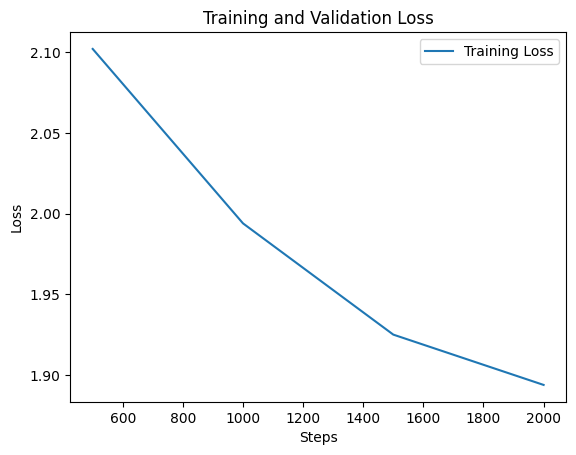

In [63]:
import torch
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
import matplotlib.pyplot as plt

# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model.to(device)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    f"finetuned-nlp-en-hi",
    gradient_checkpointing=True,
    per_device_train_batch_size=32,
    learning_rate=1e-5,
    warmup_steps=2,
    max_steps=2000,
    fp16=True,
    optim='adafactor',
    per_device_eval_batch_size=16,
    metric_for_best_model="eval_bleu",
    predict_with_generate=True,
    push_to_hub=False,
)

# Define the trainer
trainer = Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_datasets_test,
    eval_dataset=tokenized_datasets_validation,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
train_result = trainer.train()

# Extract loss logs
train_losses = []
eval_losses = []
steps = []

for log in trainer.state.log_history:
    if 'loss' in log:
        train_losses.append(log['loss'])
        steps.append(log['step'])
    if 'eval_loss' in log:
        eval_losses.append(log['eval_loss'])

# Debugging: Print the contents of the lists
print("Steps:", steps)
print("Train Losses:", train_losses)
print("Eval Losses:", eval_losses)

# Plot training and validation loss
if train_losses:
    plt.plot(steps, train_losses, label="Training Loss")
if eval_losses:
    eval_steps = [steps[i] for i in range(len(eval_losses))]
    plt.plot(eval_steps, eval_losses, label="Validation Loss")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [64]:
 !pip install sacremoses

In [54]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-hi"  # Replace with your model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

def translate(text):
    inputs = tokenizer(text, return_tensors="pt").to(device)
    translated_tokens = model.generate(**inputs, max_length=256)
    results = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
    return results

# Example usage
input_text = "Iam working and studying."  # Replace with your input text
translated_text = translate(input_text)
print("Translated Text:", translated_text)


Translated Text: मैं काम कर रहा हूँ और अध्ययन कर रहा हूँ.
